## Deep Learing Group Project_NLP



**Background:**
we load this dataset from a kaggle competition, linked for data are:
https://www.kaggle.com/c/nlp-getting-started/overview

**Competition Description:**
Twitter has become an important communication channel in times of emergency. The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).


**Description of the data:**

Each sample in the train and test set has the following information:

The text of a tweet
A keyword from that tweet (although this may be blank!)
The location the tweet was sent from (may also be blank)

we are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

Columns:
id - a unique identifier for each tweet
text - the text of the tweet
location - the location the tweet was sent from (may be blank)
keyword - a particular keyword from the tweet (may be blank)
target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

# roadmap of project

1. import dataset


2. dataset exploration with visulization tools


3. prepare data for ML model with 3 embedding method
    - word embedding on fly with tensorflow embedding layer
    - use transfer learning pre-train embedding vector_GloVe
    - use transfer learning pre-train embedding vecotr_word2vec


4. training different ANN models

    - simple ANN
    - simple ANN with regularization
    - Simple RNN
    - GRU
    - LSTM
    - LSTM with dropout and early stoping
    - Bidirectinal RNN






# 1. Import data from csv data which were download from kaggle

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
# from google.colab import files 
# uploaded = files.upload()

In [159]:
# import pandas as pd 
# import io 
  
# df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']), encoding = "ISO-8859-1") 
# df_train

In [160]:
import pandas as pd 
  
df_train = pd.read_csv('train.csv', encoding = "ISO-8859-1") 
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [161]:
df_train.shape

(7613, 5)

# 2. Initial Explorartory Data Analysis

In [162]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [163]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


0    4342
1    3271
Name: target, dtype: int64


[Text(0, 0, 'Not disaster tweets'), Text(0, 0, 'Disaster tweets')]

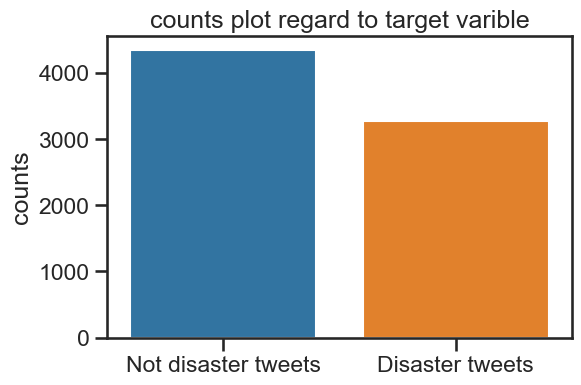

In [164]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

##checking class distribution
x=df_train.target.value_counts()
print(x)


sns.set_style('ticks')
sns.set_context('talk')
fig=plt.figure(dpi= 100, facecolor='w', edgecolor='k')
g=sns.barplot(x.index,x)
plt.gca().set_ylabel('counts')
plt.gca().set_title('counts plot regard to target varible')
g.set_xticklabels(labels=['Not disaster tweets','Disaster tweets'])

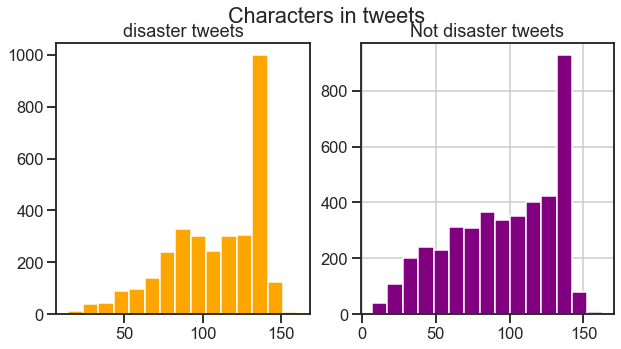

In [165]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
df_train_len=df_train[df_train['target']==1]['text'].str.len()
ax1.hist(df_train_len,color='orange',bins=15)
ax1.set_title('disaster tweets')
df_train_len=df_train[df_train['target']==0]['text'].str.len()
ax2.hist(df_train_len,color='purple',bins=15)
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.grid(True)
plt.show()

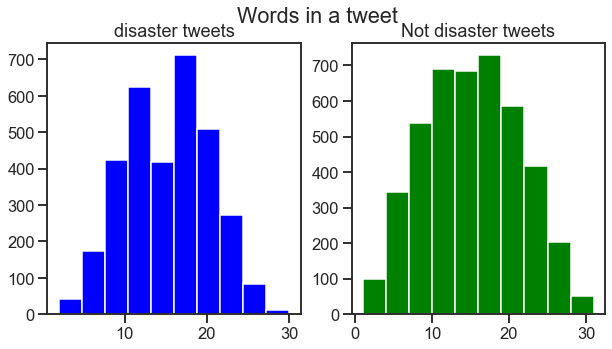

In [166]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
df_train_len=df_train[df_train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(df_train_len,color='blue',bins=10)
ax1.set_title('disaster tweets')
df_train_len=df_train[df_train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(df_train_len,color='green', bins=10)
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()




Average Length of a Tweet

Text(0.5, 0.98, 'Average word length in each tweet')

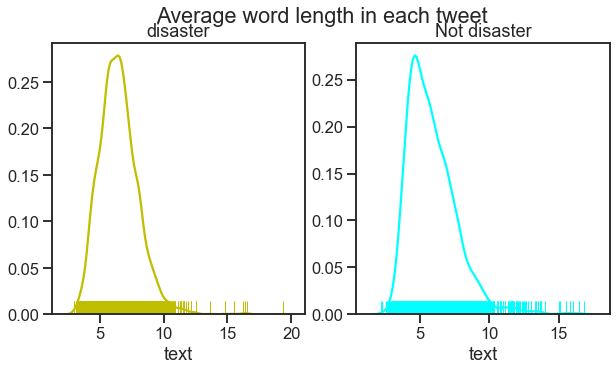

In [167]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_train[df_train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='y',rug=True, hist=False)
ax1.set_title('disaster')
word=df_train[df_train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='cyan',rug=True, hist=False)
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

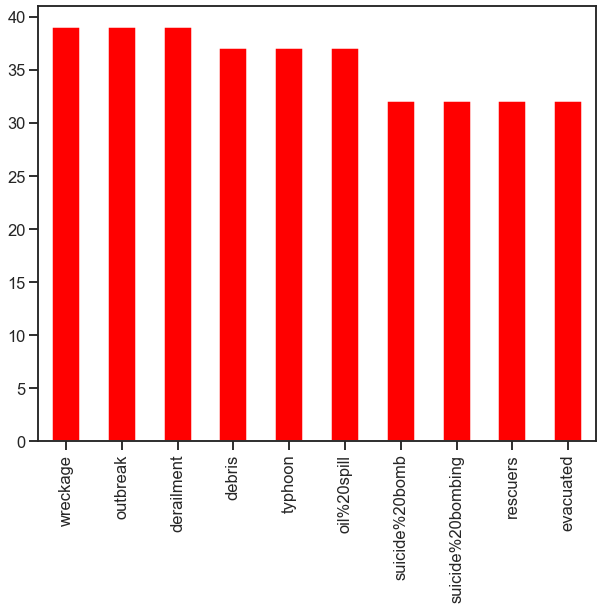

In [168]:
plt.figure(figsize=(10,8))
sns.set_context('talk')
df_train[df_train['target']==1].keyword.value_counts()[:10].plot(kind="bar", color='red')
ax1.set_title("Top 10 Keywords for disaster twitters")
plt.show()


Text(0.5, 1, 'Top 10 Keywords for none disaster twitters')

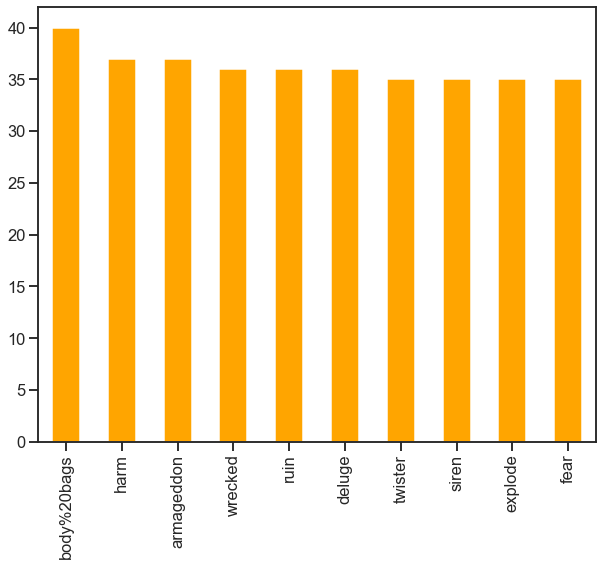

In [169]:
plt.figure(figsize=(10,8))
sns.set_context('talk')
df_train[df_train['target']==0].keyword.value_counts()[:10].plot(kind="bar",color='orange')
ax1.set_title("Top 10 Keywords for none disaster twitters")

areas to further improve:
  - add more deeps tokenization to this section in stead of only use '' to separate word 
  - the vocabolory size of each category twittier
    

# 3. Prepare data for ANN models
note: there are different ways to embedding documents, in our project we will use these three, since there are the most advanced embedding system and they all use ANN algorthim do represenation learning, this is well reflect what we learn from this course:
- option1: word embedding on fly with tensorflow embedding layer
- option2: use transfer learning pre-train embedding vector_GloVe
- option3: use transfer learning pre-train embedding vecotr_word2vec

## 3.1 word embedding on fly with tensorflow embedding layer

In [170]:
#let's first token all the text in each document and clean the special characters of the documents
import tensorflow as tf
def text_token_fun(x):
    y=tf.keras.preprocessing.text.text_to_word_sequence(x, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
    return y

df_train['text_clean_tokens']=df_train['text'].apply(text_token_fun)
#we build antother column to compare the original data and the cleaned up data to see the the difference
df_train[['text_clean_tokens','text']].head(10)

,text_clean_tokens,text
0,"[our, deeds, are, the, reason, of, this, earth...",Our Deeds are the Reason of this #earthquake M...
1,"[forest, fire, near, la, ronge, sask, canada]",Forest fire near La Ronge Sask. Canada
2,"[all, residents, asked, to, 'shelter, in, plac...",All residents asked to 'shelter in place' are ...
3,"[13, 000, people, receive, wildfires, evacuati...","13,000 people receive #wildfires evacuation or..."
4,"[just, got, sent, this, photo, from, ruby, ala...",Just got sent this photo from Ruby #Alaska as ...
5,"[rockyfire, update, california, hwy, 20, close...",#RockyFire Update => California Hwy. 20 closed...
6,"[flood, disaster, heavy, rain, causes, flash, ...",#flood #disaster Heavy rain causes flash flood...
7,"[i'm, on, top, of, the, hill, and, i, can, see...",I'm on top of the hill and I can see a fire in...
8,"[there's, an, emergency, evacuation, happening...",There's an emergency evacuation happening now ...
9,"[i'm, afraid, that, the, tornado, is, coming, ...",I'm afraid that the tornado is coming to our a...


Analysis:
base on the the comparasion, we can see that the function did a great job, it definitly clean up the orginal text, Therefore, it ok to work on with these tokens

In [171]:
# In order to build the one hot vector matrix to encode each twttier, and use the embeddinguse the embedding layer 
# we need to know how many unqiue word or the vocabolary in our dataset

#let's create a dictionnary to store all the unique words of all the text column
vocab, index = {}, 0 # start indexing from 1
for doc in df_train['text_clean_tokens']:
    for token in doc:
        if token not in vocab: 
            vocab[token] = index
            index += 1

vocab_size = len(vocab)
vocab_size

22700

ok we can see that we have 22700 unqiue words in our dataset, now we have determined the vocab size for our one_hot encoding

In [172]:
#let's check how clean is our token only from the english perspective that is if all the token are meaningful
for element in df_train['text_clean_tokens'][:30]:
    print(element)

['our', 'deeds', 'are', 'the', 'reason', 'of', 'this', 'earthquake', 'may', 'allah', 'forgive', 'us', 'all']
['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']
['all', 'residents', 'asked', 'to', "'shelter", 'in', "place'", 'are', 'being', 'notified', 'by', 'officers', 'no', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected']
['13', '000', 'people', 'receive', 'wildfires', 'evacuation', 'orders', 'in', 'california']
['just', 'got', 'sent', 'this', 'photo', 'from', 'ruby', 'alaska', 'as', 'smoke', 'from', 'wildfires', 'pours', 'into', 'a', 'school']
['rockyfire', 'update', 'california', 'hwy', '20', 'closed', 'in', 'both', 'directions', 'due', 'to', 'lake', 'county', 'fire', 'cafire', 'wildfires']
['flood', 'disaster', 'heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'manitou', 'colorado', 'springs', 'areas']
["i'm", 'on', 'top', 'of', 'the', 'hill', 'and', 'i', 'can', 'see', 'a', 'fire', 'in', 'the', 'woods']
["there's", 'a

Analysis:

After taking a quick look at our tokens result from the first 50 text row. We have discovered that from the above comparsion of original text and the clean up token it is work ok. However, there are still some nonsense tokens in the dataset need some special treatment. 

In [173]:
# now let's create a function by using tensorflow's function to embedding each twitter with one hot index directly
# in order to fit them to our ANN models
def encoding_fun(x):
    y=tf.keras.preprocessing.text.one_hot(x, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
    return y

df_train['encode_text']=df_train['text'].apply(encoding_fun)


Since we need to choice a propery size to 0 padding each tiwttier in order to tell the ANN where to start and end for RNN related model, Therefore, we need to determine what is the max inuput length for our twtitters.

In [174]:
#we first create a list which contain all the length of each twitter in our dataset
length_vector=[len(x) for x in df_train['text_clean_tokens']]
#then we use argmax to return the index of the maximum value
d=np.argmax(length_vector)
#we plot the index to find the max length of the twttier in our datset
length_vector[d]


33

In [175]:
# to double make sure 33 is the max length for our text attribute we use max funciton 
max(length_vector)

33

In [176]:
max_twitter_length = max(length_vector)
max_twitter_length

33

### 3.1.1 Split train and validate data, and padding our sequence
-note1: since we download the data from kaggle therefore, we don't have to actually label for test dataset, therefore, we will split the a portion of the train data as our validation data just for the purpose of this project.

-note2: based on our quick look over the data of the 'counts plot regard to target varible' graph, we can see that we do have an imbalance dataset, therefore, we do need to apply stratified split of the data


In [177]:
#since we do have an slit imbalance dataset, therefore, it is the best to do a stratified sampling 
#to split train and valid
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(df_train, df_train["target"]):
    strat_train_set = df_train.loc[train_index]
    strat_valid_set = df_train.loc[valid_index]


# after getting the train and valid dataset, let's now split the Xmatrix and y label from each dataset
X_train=strat_train_set['encode_text']
y_train=strat_train_set['target']

X_valid=strat_valid_set['encode_text']
y_valid=strat_valid_set['target']

In [178]:
#let's check if we split the right ratio
print(len(X_train)/len(df_train['text']))
print(len(X_valid)/len(df_train['text']))

0.7999474582950217
0.20005254170497833


In [179]:
from tensorflow.keras.preprocessing import sequence
#since all the twitter has different length and we need to have a uniform length of sentent to fit into your
#RNN therefore, we need pading our sentence

X_train = sequence.pad_sequences(X_train, maxlen=max_twitter_length)
X_valid = sequence.pad_sequences(X_valid, maxlen=max_twitter_length)

# 3.2 use transfer learning pre-train embedding vector_GloVe


In [180]:
from keras.preprocessing import sequence, text
X_train2=strat_train_set['text']
y_train2=strat_train_set['target']

X_valid2=strat_valid_set['text']
y_valid2=strat_valid_set['target']

In [181]:
#since in order to use the pre-train word vectors by Glove, we need to keep the word and word index of onehot
#matrix for our dataset, therefore, this time we used tokenizer instead of onehot function directly

token = text.Tokenizer(num_words=None, lower=True)
token.fit_on_texts(df_train['text'])
X_train2_seq = token.texts_to_sequences(X_train2)
X_train2_seq = token.texts_to_sequences(X_valid2)

# pad the sequences
xtrain_pad = sequence.pad_sequences(X_train2_seq, maxlen=max_twitter_length)
xvalid_pad = sequence.pad_sequences(X_train2_seq, maxlen=max_twitter_length)

word_index = token.word_index
#let's check if we have the same length as above
len(word_index)

22700

In [182]:
# load the GloVe vectors which we download from the internet into a dictionary: 
#the links are http://www-nlp.stanford.edu/data/glove.840B.300d.zip
from tqdm import tqdm
embeddings_index = {}
f = open('glove.840B.300d.txt')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

#print('Found %s word vectors.' % len(embeddings_index))

2196017it [06:03, 6042.45it/s]


In [183]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix_glove = np.zeros((len(word_index), 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_glove[i] = embedding_vector

100%|██████████| 22700/22700 [00:06<00:00, 3420.80it/s]


# 3.3 use transfer learning pre-train embedding vecotr_word2vec

In [184]:
# this step is similar as the above, the only difference is that we use word2vector pre train vectors
# the download link is https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
filepath = "GoogleNews-vectors-negative300.bin"
embeddings_index_w2v = {}
from gensim.models import KeyedVectors
wv_from_bin = KeyedVectors.load_word2vec_format(filepath, binary=True) 
for word, vector in zip(wv_from_bin.vocab, wv_from_bin.vectors):
    coefs = np.asarray(vector, dtype='float32')
    embeddings_index_w2v[word] = coefs
print('Found %s word vectors.' % len(embeddings_index_w2v))

Found 3000000 word vectors.


In [185]:

# create an embedding matrix for the words we have in the dataset
embedding_matrix_w2v = np.zeros((len(word_index), 300))
for word, i in tqdm(word_index.items()):
    embedding_vector_w2v = embeddings_index_w2v.get(word)
    if embedding_vector_w2v is not None:
        embedding_matrix_w2v[i] = embedding_vector_w2v




100%|██████████| 22700/22700 [00:01<00:00, 12181.90it/s]


Areas could be further improved:
   - do more more advanced clean up while tokenize the text in order to produce better performance
   - combine sckit_learn countervector or tfidf word encoding to tensorflow
   - use tensorflow with word2vec to cureate more customized word embedding vector to our project

# 4. Model Training

The different models we will apply to our problems:
- simple ANN
- simple ANN with regularization
- Simple RNN
- GRU
- LSTM
- LSTM with dropout and early stoping
- Bidirectinal RNN

In [186]:
# let's import the neccesary lib for this section
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding,Flatten,SimpleRNN,GRU
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
# since we download 300dimension vector to represent word from glove and word2vec, it will be easier for use to 
# compare the different model if we keep all 3 differen embedding technique with the same vector dimension, 
# therefore, we setting embedding vector_length = 300 for all the embedding layer
embedding_vector_length = 300

## 4.1 let's first define the two metric plot function(accuracy and auc) we will used for our model

In [187]:
def plot_acc_loss(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()

In [188]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr, label=None): 
        plt.plot(fpr, tpr, linewidth=2, label=label) 
        plt.plot([0, 1], [0, 1], 'k--') 
        plt.axis([0, 1, 0, 1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

## 4.2 Simple ANN binary classification_with_prepare_option1

In [189]:
ANN_model = Sequential()
ANN_model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))
#to reduce the computation power and take advantage of the represenatioin learning from ANN we use add an embedding layer
ANN_model.add(Flatten())
#since we the output dimension of embedding layer and dense layer are different due embedding layer output one word vecoter per row/column, but
#the dense layer take one sentece per layer,therefore we need to add a flatten layer before pass to dense layer
ANN_model.add(Dense(100, activation='relu'))
#note for hidden layer we could choolse 'relu' or 'tanh' due to they will cause less vanishing gradient problem, we could use both for hidden 
#layers since we don't have a deep NN, but for let's go with the classic
ANN_model.add(Dense(50, activation='relu'))
ANN_model.add(Dense(1, activation='sigmoid'))
#since we are doing binary classification problem, therefore, we use sigmoid as our active function instead of softmax
ANN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#we do have a imbalance dataset base on the target plot of exploration stage, however, the imbalance ratio is less than 1:10, 
#the actually ratio of False: True is false 4342: 3271,so we can treat is as a balance dataset, therefore we can use accuracy
#as our metric for our binary classfication model


In [190]:
history = ANN_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=256, verbose=2)
# since use a batch size which is the power of 2 can be faster for computation, therefore, we chhose 256
scores = ANN_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
24/24 - 3s - loss: 0.6483 - accuracy: 0.6097 - val_loss: 0.6104 - val_accuracy: 0.6842
Epoch 2/10
24/24 - 3s - loss: 0.4740 - accuracy: 0.7956 - val_loss: 0.4861 - val_accuracy: 0.7840
Epoch 3/10
24/24 - 3s - loss: 0.1685 - accuracy: 0.9463 - val_loss: 0.5434 - val_accuracy: 0.7800
Epoch 4/10
24/24 - 3s - loss: 0.0493 - accuracy: 0.9851 - val_loss: 0.6158 - val_accuracy: 0.7597
Epoch 5/10
24/24 - 3s - loss: 0.0283 - accuracy: 0.9921 - val_loss: 0.6572 - val_accuracy: 0.7682
Epoch 6/10
24/24 - 3s - loss: 0.0245 - accuracy: 0.9928 - val_loss: 0.7029 - val_accuracy: 0.7452
Epoch 7/10
24/24 - 3s - loss: 0.0210 - accuracy: 0.9939 - val_loss: 0.7003 - val_accuracy: 0.7452
Epoch 8/10
24/24 - 3s - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.7006 - val_accuracy: 0.7643
Epoch 9/10
24/24 - 3s - loss: 0.0164 - accuracy: 0.9954 - val_loss: 0.6889 - val_accuracy: 0.7689
Epoch 10/10
24/24 - 3s - loss: 0.0143 - accuracy: 0.9959 - val_loss: 0.7368 - val_accuracy: 0.7387
Accuracy: 73.87%


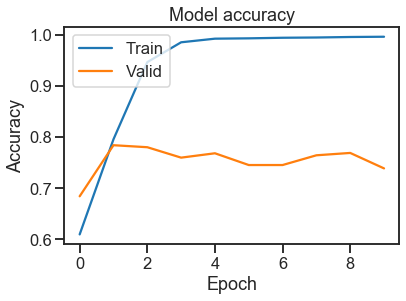

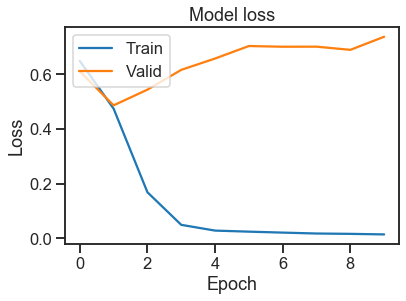

In [191]:
plot_acc_loss(history)

Analysis: 

This model have overfitting problem, since our valid's accuracy is lower than our train accuracy; Therefore, we need to apply regularization techniques to our model such as dropout, L2, earlystopping. but let's see what it looks like with other embedding techniques

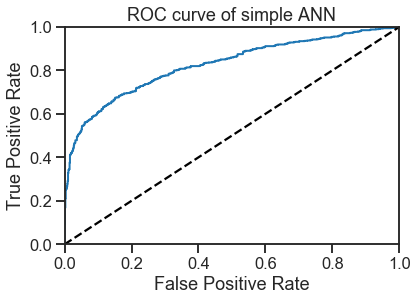

area under the curve is: 0.8249648969077606


In [192]:
# accuracy number is a good indicator for our model, Howver, AUC is good for vizulation to the audience, therefore, we add this addtional plot
y_predict = ANN_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple ANN')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

## 4.2 Simple ANN binary classification_with_prepare_option2_Glove

In [193]:
ANN_model = Sequential()
ANN_model.add(Embedding(vocab_size, embedding_vector_length, 
                        weights=[embedding_matrix_glove],
                        input_length=max_twitter_length,
                         trainable=False))
#lets add our pretrained glove word vector matrix to our embedding layer                        
ANN_model.add(Flatten())
ANN_model.add(Dense(100, activation='relu'))
ANN_model.add(Dense(50, activation='relu'))
ANN_model.add(Dense(1, activation='sigmoid'))

ANN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = ANN_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=256, verbose=2)
# since use a batch size which is the power of 2 can be faster for computation, therefore, we chhose 256
scores = ANN_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
24/24 - 1s - loss: 0.6528 - accuracy: 0.6138 - val_loss: 0.6295 - val_accuracy: 0.6533
Epoch 2/10
24/24 - 1s - loss: 0.4791 - accuracy: 0.7839 - val_loss: 0.6519 - val_accuracy: 0.6303
Epoch 3/10
24/24 - 1s - loss: 0.3134 - accuracy: 0.8846 - val_loss: 0.7419 - val_accuracy: 0.6441
Epoch 4/10
24/24 - 1s - loss: 0.1757 - accuracy: 0.9484 - val_loss: 0.8857 - val_accuracy: 0.6448
Epoch 5/10
24/24 - 1s - loss: 0.1103 - accuracy: 0.9704 - val_loss: 1.0169 - val_accuracy: 0.6435
Epoch 6/10
24/24 - 1s - loss: 0.0762 - accuracy: 0.9814 - val_loss: 1.1893 - val_accuracy: 0.6586
Epoch 7/10
24/24 - 1s - loss: 0.0637 - accuracy: 0.9823 - val_loss: 1.2218 - val_accuracy: 0.6389
Epoch 8/10
24/24 - 1s - loss: 0.0457 - accuracy: 0.9849 - val_loss: 1.3185 - val_accuracy: 0.6435
Epoch 9/10
24/24 - 1s - loss: 0.0438 - accuracy: 0.9867 - val_loss: 1.3659 - val_accuracy: 0.6540
Epoch 10/10
24/24 - 1s - loss: 0.0402 - accuracy: 0.9865 - val_loss: 1.4277 - val_accuracy: 0.6402
Accuracy: 64.02%


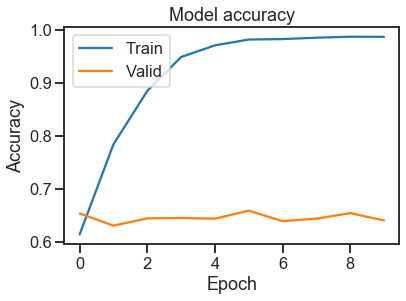

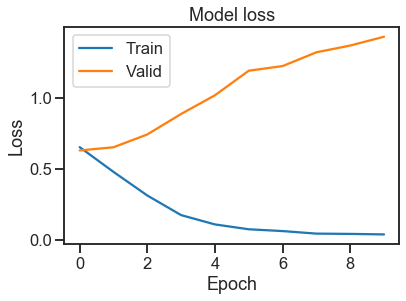

In [194]:
plot_acc_loss(history)

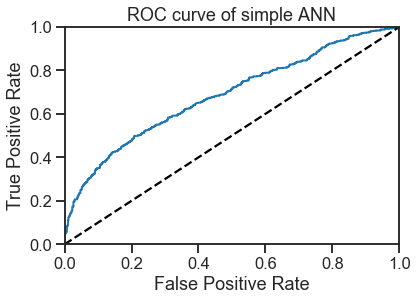

area under the curve is: 0.685436703582099


In [195]:
# accuracy number is a good indicator for our model, Howver, AUC is good for vizulation to the audience, therefore, we add this addtional plot
y_predict = ANN_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple ANN')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

analysis:

therectically speaking we thougth use more advanced embedding will give use better result, but this is not the case; let's see how happen with word2vector model

## 4.2 Simple ANN binary classification_with_prepare_option3_word2vector

In [196]:
ANN_model = Sequential()
ANN_model.add(Embedding(vocab_size, embedding_vector_length, 
                        weights=[embedding_matrix_w2v],
                        input_length=max_twitter_length,
                         trainable=False))
#lets add our pretrained glove word vector matrix to our embedding layer                        

ANN_model.add(Flatten())
ANN_model.add(Dense(100, activation='relu'))
ANN_model.add(Dense(50, activation='relu'))
ANN_model.add(Dense(1, activation='sigmoid'))

ANN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = ANN_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=256, verbose=2)
# since use a batch size which is the power of 2 can be faster for computation, therefore, we chhose 256
scores = ANN_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
24/24 - 1s - loss: 0.6510 - accuracy: 0.6314 - val_loss: 0.6246 - val_accuracy: 0.6559
Epoch 2/10
24/24 - 1s - loss: 0.5016 - accuracy: 0.7608 - val_loss: 0.6264 - val_accuracy: 0.6730
Epoch 3/10
24/24 - 1s - loss: 0.3558 - accuracy: 0.8562 - val_loss: 0.6955 - val_accuracy: 0.6651
Epoch 4/10
24/24 - 1s - loss: 0.2274 - accuracy: 0.9213 - val_loss: 0.8215 - val_accuracy: 0.6763
Epoch 5/10
24/24 - 1s - loss: 0.1481 - accuracy: 0.9563 - val_loss: 0.9582 - val_accuracy: 0.6540
Epoch 6/10
24/24 - 1s - loss: 0.0980 - accuracy: 0.9745 - val_loss: 1.1133 - val_accuracy: 0.6481
Epoch 7/10
24/24 - 1s - loss: 0.0806 - accuracy: 0.9777 - val_loss: 1.1827 - val_accuracy: 0.6500
Epoch 8/10
24/24 - 1s - loss: 0.0675 - accuracy: 0.9803 - val_loss: 1.2478 - val_accuracy: 0.6540
Epoch 9/10
24/24 - 1s - loss: 0.0576 - accuracy: 0.9831 - val_loss: 1.3543 - val_accuracy: 0.6382
Epoch 10/10
24/24 - 1s - loss: 0.0449 - accuracy: 0.9849 - val_loss: 1.3900 - val_accuracy: 0.6533
Accuracy: 65.33%


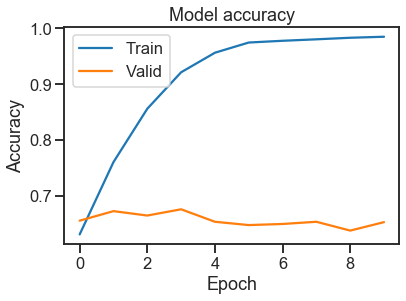

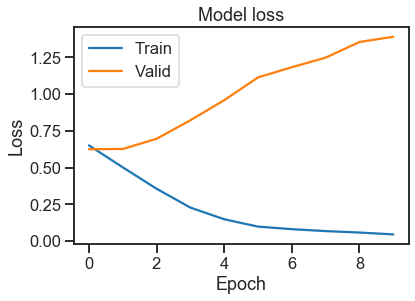

In [197]:
plot_acc_loss(history)

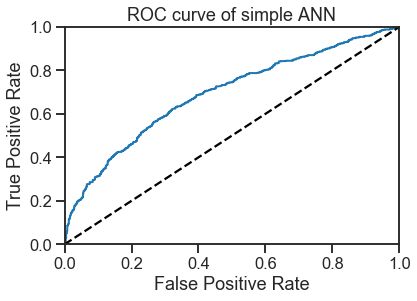

area under the curve is: 0.6908772429908187


In [198]:
# accuracy number is a good indicator for our model, Howver, AUC is good for vizulation to the audience, therefore, we add this addtional plot
y_predict = ANN_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple ANN')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

analysis:

base on the above to ANN model combine with tow pretain embedding vectors matrix(glove and word2vec); we can conclude that althought golve and word2vect all trained with massive data bofore, but it does not working well with our dataset there are two possible reasons:

- pre-train embedding make the overfitting problem even worse, so we need to apply regularization to it
- pre-train embedding is working betther with RNN model, but not ANN
- pre-train embedding is too advance to suite for our dataset

**next**: since all the above model have overfitting problem, let's apply regularization to all of them

## 4.2a(option1) Simple ANN binary classification and regularization technique_dropout

In [199]:
ANN_drop_model = Sequential()
ANN_drop_model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))
ANN_drop_model.add(Flatten())

ANN_drop_model.add(Dense(100, activation='relu'))
ANN_drop_model.add(Dropout(0.7))

ANN_drop_model.add(Dense(50, activation='relu'))
ANN_drop_model.add(Dropout(0.7))

ANN_drop_model.add(Dense(1, activation='sigmoid'))
ANN_drop_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = ANN_drop_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=256, verbose=2)
scores = ANN_drop_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
24/24 - 3s - loss: 0.6867 - accuracy: 0.5438 - val_loss: 0.6638 - val_accuracy: 0.5706
Epoch 2/20
24/24 - 3s - loss: 0.6585 - accuracy: 0.5635 - val_loss: 0.6481 - val_accuracy: 0.5712
Epoch 3/20
24/24 - 3s - loss: 0.6284 - accuracy: 0.5924 - val_loss: 0.6160 - val_accuracy: 0.6953
Epoch 4/20
24/24 - 3s - loss: 0.5513 - accuracy: 0.7059 - val_loss: 0.5253 - val_accuracy: 0.7866
Epoch 5/20
24/24 - 3s - loss: 0.3435 - accuracy: 0.8729 - val_loss: 0.4722 - val_accuracy: 0.7997
Epoch 6/20
24/24 - 3s - loss: 0.1506 - accuracy: 0.9603 - val_loss: 0.6730 - val_accuracy: 0.7505
Epoch 7/20
24/24 - 2s - loss: 0.0767 - accuracy: 0.9833 - val_loss: 0.7567 - val_accuracy: 0.7617
Epoch 8/20
24/24 - 2s - loss: 0.0501 - accuracy: 0.9877 - val_loss: 0.8689 - val_accuracy: 0.7708
Epoch 9/20
24/24 - 2s - loss: 0.0346 - accuracy: 0.9910 - val_loss: 0.9985 - val_accuracy: 0.7682
Epoch 10/20
24/24 - 3s - loss: 0.0308 - accuracy: 0.9936 - val_loss: 0.9678 - val_accuracy: 0.7820
Epoch 11/20
24/24 -

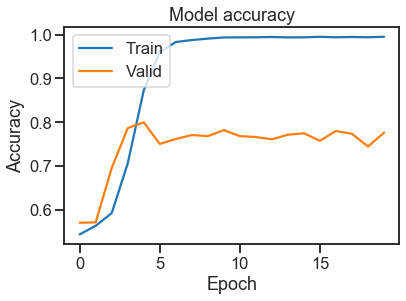

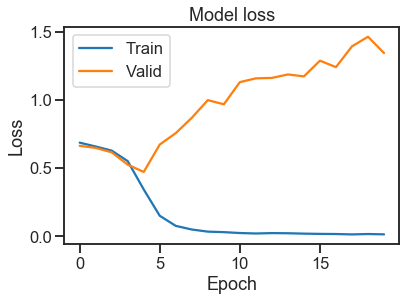

In [200]:
plot_acc_loss(history)

In [201]:
y_predict = ANN_drop_model.predict(X_valid)

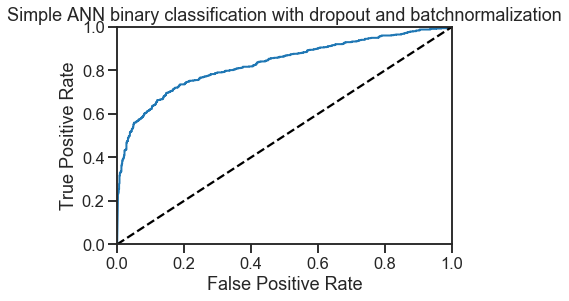

area under the curve is: 0.8311426892311806


In [202]:
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)
plot_roc_curve(fpr, tpr)
plt.title('Simple ANN binary classification with dropout and batchnormalization')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

Analysis: 

from the accuracy store we can see that by apply dropout, we did manage to slow down the increase of accuracy of the training set, however it did not really make a difference on our valid dataset accuracy. but the auc store did increase abit. possible reason:
- we may need more clean tokens



## 4.2b (option1) Simple ANN binary classification with regularization technique_L2

In [203]:
ANN_L2_model = Sequential()
ANN_L2_model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))
ANN_L2_model.add(Flatten())

ANN_L2_model.add(Dense(100, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.05)))

ANN_L2_model.add(Dense(50, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.05)))

ANN_L2_model.add(Dense(1, activation='sigmoid'))
ANN_L2_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = ANN_L2_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=256, verbose=2)
scores = ANN_L2_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
24/24 - 3s - loss: 6.3570 - accuracy: 0.5844 - val_loss: 3.0710 - val_accuracy: 0.5877
Epoch 2/10
24/24 - 3s - loss: 2.6347 - accuracy: 0.6670 - val_loss: 2.1991 - val_accuracy: 0.6953
Epoch 3/10
24/24 - 3s - loss: 1.8575 - accuracy: 0.7931 - val_loss: 1.6185 - val_accuracy: 0.7768
Epoch 4/10
24/24 - 3s - loss: 1.3385 - accuracy: 0.8701 - val_loss: 1.2629 - val_accuracy: 0.7781
Epoch 5/10
24/24 - 3s - loss: 0.9719 - accuracy: 0.9186 - val_loss: 1.0350 - val_accuracy: 0.7925
Epoch 6/10
24/24 - 3s - loss: 0.7110 - accuracy: 0.9494 - val_loss: 0.9147 - val_accuracy: 0.7702
Epoch 7/10
24/24 - 3s - loss: 0.5519 - accuracy: 0.9617 - val_loss: 0.7842 - val_accuracy: 0.7997
Epoch 8/10
24/24 - 3s - loss: 0.4297 - accuracy: 0.9759 - val_loss: 0.7425 - val_accuracy: 0.7735
Epoch 9/10
24/24 - 3s - loss: 0.3554 - accuracy: 0.9791 - val_loss: 0.6920 - val_accuracy: 0.7827
Epoch 10/10
24/24 - 3s - loss: 0.3010 - accuracy: 0.9837 - val_loss: 0.6618 - val_accuracy: 0.7866
Accuracy: 78.66%


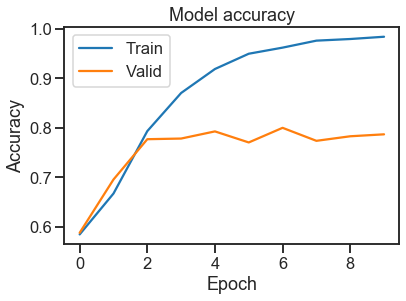

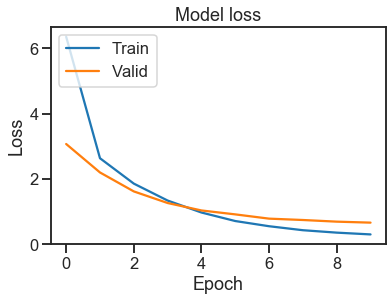

In [204]:
plot_acc_loss(history)

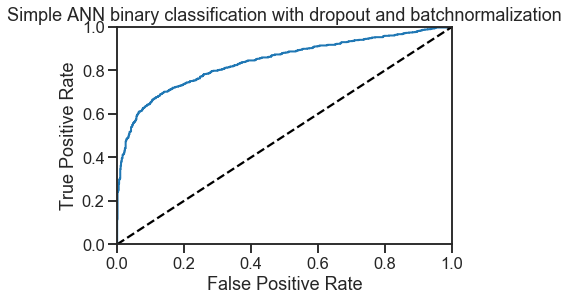

area under the curve is: 0.8404507272234597


In [205]:
y_predict = ANN_L2_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)
plot_roc_curve(fpr, tpr)
plt.title('Simple ANN binary classification with dropout and batchnormalization')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

analysis:

L2 seems increase the accuracy and AUC compare to the non-regular option, but it is just not significant enougth to prove it actually has a effect on the model, this increase can be totally due to the randomness of SCG optimization process.

## 4.2c (option1) Simple ANN binary classification with combine regularization technique(L2, dropout)

In [206]:
ANN_ar_model = Sequential()
ANN_ar_model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))

ANN_ar_model.add(Flatten())

ANN_ar_model.add(Dense(100, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.2)))
ANN_ar_model.add(Dropout(0.2))

ANN_ar_model.add(Dense(50, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.2)))
ANN_ar_model.add(Dropout(0.2))

ANN_ar_model.add(Dense(1, activation='sigmoid'))
ANN_ar_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = ANN_ar_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=256, verbose=2)
scores = ANN_ar_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
24/24 - 3s - loss: 23.5266 - accuracy: 0.5639 - val_loss: 10.4075 - val_accuracy: 0.5706
Epoch 2/20
24/24 - 3s - loss: 8.7151 - accuracy: 0.5736 - val_loss: 6.9507 - val_accuracy: 0.5712
Epoch 3/20
24/24 - 3s - loss: 5.7904 - accuracy: 0.6059 - val_loss: 4.7300 - val_accuracy: 0.5712
Epoch 4/20
24/24 - 3s - loss: 3.9881 - accuracy: 0.6678 - val_loss: 3.2841 - val_accuracy: 0.6921
Epoch 5/20
24/24 - 3s - loss: 2.7886 - accuracy: 0.7102 - val_loss: 2.3257 - val_accuracy: 0.7045
Epoch 6/20
24/24 - 3s - loss: 1.9834 - accuracy: 0.7622 - val_loss: 1.6884 - val_accuracy: 0.7479
Epoch 7/20
24/24 - 3s - loss: 1.4451 - accuracy: 0.8049 - val_loss: 1.2770 - val_accuracy: 0.7728
Epoch 8/20
24/24 - 3s - loss: 1.0857 - accuracy: 0.8392 - val_loss: 1.0338 - val_accuracy: 0.7577
Epoch 9/20
24/24 - 3s - loss: 0.8485 - accuracy: 0.8624 - val_loss: 0.8599 - val_accuracy: 0.7820
Epoch 10/20
24/24 - 3s - loss: 0.6802 - accuracy: 0.8939 - val_loss: 0.7549 - val_accuracy: 0.7958
Epoch 11/20
24/24

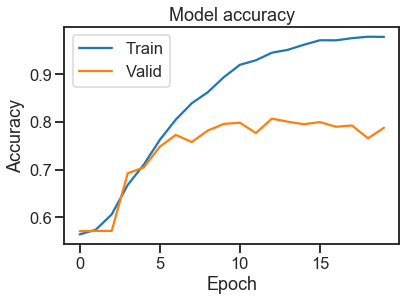

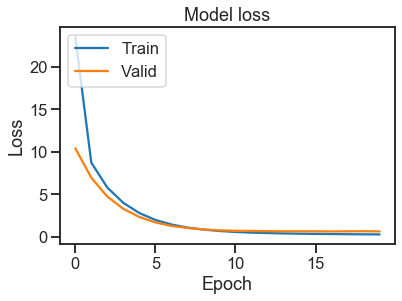

In [207]:
plot_acc_loss(history)

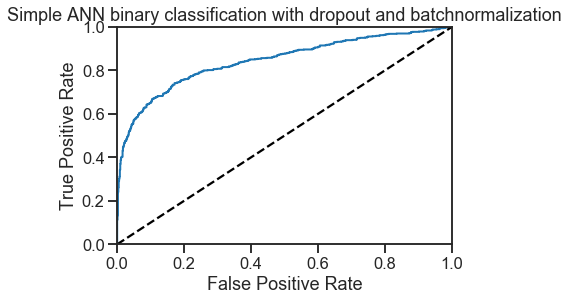

area under the curve is: 0.8439944679638095


In [208]:
y_predict = ANN_ar_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)
plot_roc_curve(fpr, tpr)
plt.title('Simple ANN binary classification with dropout and batchnormalization')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

analysis:

again it did increase 2% of accuracy, but we do not if it is really due to the regularization, let's test our hypothese with pre-tain embedding technique

## 4.2c (option1) Simple ANN binary classification with combine regularization technique(L2, dropout) combine with early stopping
note: since our performance score constantly fluctuating, it the best to use early stopping technique

In [209]:
ANN_ar_model = Sequential()
ANN_ar_model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))

ANN_ar_model.add(Flatten())

ANN_ar_model.add(Dense(100, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.2)))
ANN_ar_model.add(Dropout(0.2))

ANN_ar_model.add(Dense(50, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.2)))
ANN_ar_model.add(Dropout(0.2))

ANN_ar_model.add(Dense(1, activation='sigmoid'))
ANN_ar_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [210]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=4, restore_best_weights=True)
history = ANN_ar_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=300, verbose=2, callbacks=es)
scores = ANN_ar_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
21/21 - 3s - loss: 25.7032 - accuracy: 0.5665 - val_loss: 11.1946 - val_accuracy: 0.5706
Epoch 2/20
21/21 - 2s - loss: 9.4501 - accuracy: 0.5783 - val_loss: 7.7825 - val_accuracy: 0.5739
Epoch 3/20
21/21 - 2s - loss: 6.5905 - accuracy: 0.6189 - val_loss: 5.4427 - val_accuracy: 0.6730
Epoch 4/20
21/21 - 2s - loss: 4.7053 - accuracy: 0.6750 - val_loss: 3.9514 - val_accuracy: 0.6100
Epoch 5/20
21/21 - 2s - loss: 3.4204 - accuracy: 0.7039 - val_loss: 2.8912 - val_accuracy: 0.7360
Epoch 6/20
21/21 - 2s - loss: 2.5025 - accuracy: 0.7770 - val_loss: 2.1527 - val_accuracy: 0.7551
Epoch 7/20
21/21 - 2s - loss: 1.8584 - accuracy: 0.8143 - val_loss: 1.6379 - val_accuracy: 0.7708
Epoch 8/20
21/21 - 2s - loss: 1.4029 - accuracy: 0.8506 - val_loss: 1.2936 - val_accuracy: 0.7722
Epoch 9/20
21/21 - 2s - loss: 1.0803 - accuracy: 0.8770 - val_loss: 1.0593 - val_accuracy: 0.7814
Epoch 10/20
21/21 - 2s - loss: 0.8577 - accuracy: 0.8979 - val_loss: 0.9233 - val_accuracy: 0.7840
Epoch 11/20
21/21

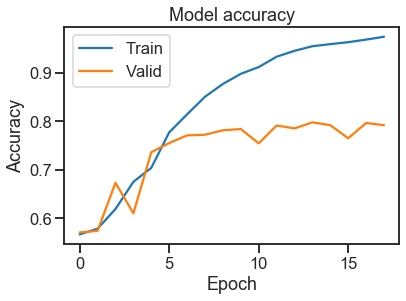

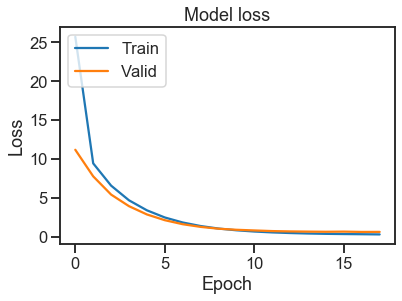

In [211]:
plot_acc_loss(history)

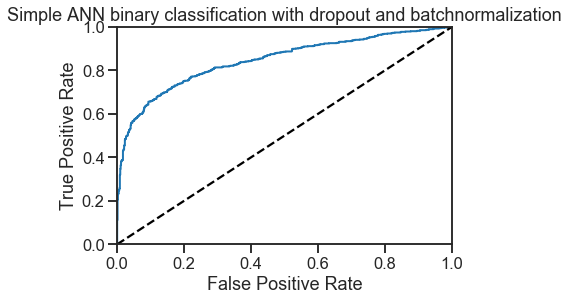

area under the curve is: 0.8453422859415195


In [212]:
y_predict = ANN_ar_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)
plot_roc_curve(fpr, tpr)
plt.title('Simple ANN binary classification with dropout and batchnormalization')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

## 4.2c (option2) Simple ANN binary classification with combine regularization technique(L2, dropout)

In [62]:
ANN_ar_model = Sequential()
ANN_ar_model.add(Embedding(vocab_size, embedding_vector_length, 
                        weights=[embedding_matrix_glove],
                        input_length=max_twitter_length,
                         trainable=False))
ANN_ar_model.add(Flatten())

ANN_ar_model.add(Dense(100, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.03)))
ANN_ar_model.add(Dropout(0.2))

ANN_ar_model.add(Dense(50, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.03)))
ANN_ar_model.add(Dropout(0.2))

ANN_ar_model.add(Dense(1, activation='sigmoid'))
ANN_ar_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = ANN_ar_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=256, verbose=2)
scores = ANN_ar_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
24/24 - 1s - loss: 4.3631 - accuracy: 0.6084 - val_loss: 2.2080 - val_accuracy: 0.6402
Epoch 2/20
24/24 - 1s - loss: 1.8928 - accuracy: 0.6821 - val_loss: 1.6763 - val_accuracy: 0.6527
Epoch 3/20
24/24 - 1s - loss: 1.4540 - accuracy: 0.7182 - val_loss: 1.3635 - val_accuracy: 0.6513
Epoch 4/20
24/24 - 1s - loss: 1.1866 - accuracy: 0.7452 - val_loss: 1.1737 - val_accuracy: 0.6415
Epoch 5/20
24/24 - 1s - loss: 1.0044 - accuracy: 0.7465 - val_loss: 1.0292 - val_accuracy: 0.6428
Epoch 6/20
24/24 - 1s - loss: 0.8723 - accuracy: 0.7612 - val_loss: 0.9413 - val_accuracy: 0.6323
Epoch 7/20
24/24 - 1s - loss: 0.7815 - accuracy: 0.7762 - val_loss: 0.8818 - val_accuracy: 0.6395
Epoch 8/20
24/24 - 1s - loss: 0.7235 - accuracy: 0.7823 - val_loss: 0.8593 - val_accuracy: 0.6605
Epoch 9/20
24/24 - 1s - loss: 0.6844 - accuracy: 0.7924 - val_loss: 0.8414 - val_accuracy: 0.6349
Epoch 10/20
24/24 - 1s - loss: 0.6527 - accuracy: 0.8016 - val_loss: 0.8219 - val_accuracy: 0.6343
Epoch 11/20
24/24 -

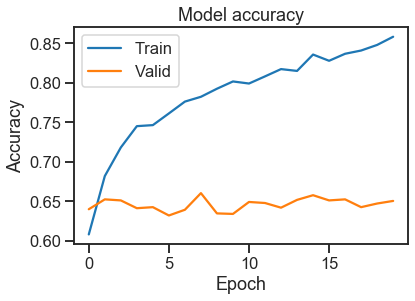

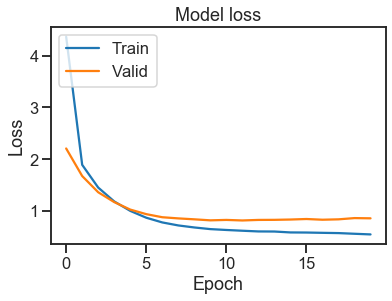

In [63]:
plot_acc_loss(history)

## 4.2c (option3) Simple ANN binary classification with combine regularization technique(L2, dropout)

In [64]:
ANN_ar_model = Sequential()
ANN_ar_model.add(Embedding(vocab_size, embedding_vector_length, 
                        weights=[embedding_matrix_w2v],
                        input_length=max_twitter_length,
                         trainable=False))
ANN_ar_model.add(Flatten())

ANN_ar_model.add(Dense(100, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
ANN_ar_model.add(Dropout(0.2))

ANN_ar_model.add(Dense(50, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
ANN_ar_model.add(Dropout(0.2))

ANN_ar_model.add(Dense(1, activation='sigmoid'))
ANN_ar_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = ANN_ar_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=256, verbose=2)
scores = ANN_ar_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
24/24 - 1s - loss: 1.9776 - accuracy: 0.6031 - val_loss: 1.2253 - val_accuracy: 0.6422
Epoch 2/20
24/24 - 1s - loss: 1.0936 - accuracy: 0.6683 - val_loss: 1.0206 - val_accuracy: 0.6632
Epoch 3/20
24/24 - 1s - loss: 0.9244 - accuracy: 0.7222 - val_loss: 0.9394 - val_accuracy: 0.6645
Epoch 4/20
24/24 - 1s - loss: 0.8195 - accuracy: 0.7509 - val_loss: 0.8777 - val_accuracy: 0.6678
Epoch 5/20
24/24 - 1s - loss: 0.7517 - accuracy: 0.7660 - val_loss: 0.8669 - val_accuracy: 0.6579
Epoch 6/20
24/24 - 1s - loss: 0.6939 - accuracy: 0.7877 - val_loss: 0.8645 - val_accuracy: 0.6546
Epoch 7/20
24/24 - 1s - loss: 0.6562 - accuracy: 0.8026 - val_loss: 0.8256 - val_accuracy: 0.6625
Epoch 8/20
24/24 - 1s - loss: 0.6170 - accuracy: 0.8212 - val_loss: 0.8213 - val_accuracy: 0.6671
Epoch 9/20
24/24 - 1s - loss: 0.5911 - accuracy: 0.8309 - val_loss: 0.8337 - val_accuracy: 0.6507
Epoch 10/20
24/24 - 1s - loss: 0.5774 - accuracy: 0.8369 - val_loss: 0.8383 - val_accuracy: 0.6559
Epoch 11/20
24/24 -

analysis:

after apply regularization techque to All ANN model with different embedding technique, it did not really improve our model's preformance, there are 2 reasons:
-regularization does not working for our problem
-we did not find the best hyperparameters for our model

**Conclusion**: so far base on accuracty metric, Simply ANN without pre-train preform the best

## 4.3(option1) Simple RNN binary classification with prepare

note: since we are deal with sentence, therefore, the order of words are important, so we would expect an RNN model will be a better fit for this problem

In [68]:

RNN_model = Sequential()
RNN_model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))
RNN_model.add(SimpleRNN(100))
RNN_model.add(Dense(1, activation='sigmoid'))
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = RNN_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=15, batch_size=256, verbose=2)
scores = RNN_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/15
24/24 - 4s - loss: 0.6392 - accuracy: 0.6360 - val_loss: 0.6137 - val_accuracy: 0.6579
Epoch 2/15
24/24 - 4s - loss: 0.3074 - accuracy: 0.9018 - val_loss: 0.6559 - val_accuracy: 0.6809
Epoch 3/15
24/24 - 4s - loss: 0.0931 - accuracy: 0.9708 - val_loss: 0.8032 - val_accuracy: 0.6487
Epoch 4/15
24/24 - 4s - loss: 0.0549 - accuracy: 0.9828 - val_loss: 0.8449 - val_accuracy: 0.6441
Epoch 5/15
24/24 - 4s - loss: 0.0354 - accuracy: 0.9875 - val_loss: 0.8039 - val_accuracy: 0.6822
Epoch 6/15
24/24 - 4s - loss: 0.0312 - accuracy: 0.9883 - val_loss: 0.8021 - val_accuracy: 0.6842
Epoch 7/15
24/24 - 4s - loss: 0.0229 - accuracy: 0.9918 - val_loss: 0.8375 - val_accuracy: 0.6901
Epoch 8/15
24/24 - 4s - loss: 0.0203 - accuracy: 0.9931 - val_loss: 0.8534 - val_accuracy: 0.6730
Epoch 9/15
24/24 - 4s - loss: 0.0164 - accuracy: 0.9944 - val_loss: 0.8625 - val_accuracy: 0.6789
Epoch 10/15
24/24 - 4s - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.8395 - val_accuracy: 0.6934
Epoch 11/15
24/24 -

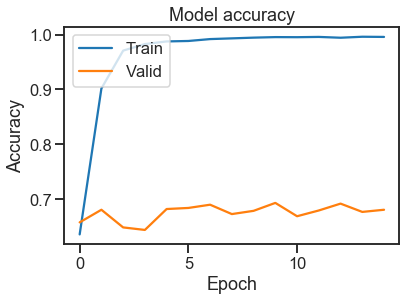

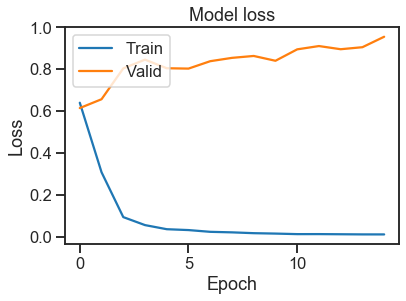

In [69]:
plot_acc_loss(history)

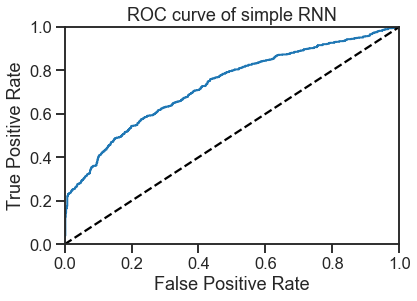

area under the curve is: 0.730088892642603


In [70]:
y_predict = RNN_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple RNN')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

Analysis: 

this simple RNN model without regularization preform worse than our simple ANN, let's try it with pre-train embedding vectors

## 4.3(option2_glove) Simple RNN binary classification 

In [71]:
RNN_model = Sequential()
RNN_model.add(Embedding(vocab_size, embedding_vector_length, 
                        weights=[embedding_matrix_glove],
                        input_length=max_twitter_length,
                         trainable=False))
RNN_model.add(SimpleRNN(100))
RNN_model.add(Dense(1, activation='sigmoid'))
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = RNN_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=256, verbose=2)
scores = RNN_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
24/24 - 1s - loss: 0.6770 - accuracy: 0.5887 - val_loss: 0.6606 - val_accuracy: 0.6192
Epoch 2/10
24/24 - 1s - loss: 0.6135 - accuracy: 0.6542 - val_loss: 0.6469 - val_accuracy: 0.6271
Epoch 3/10
24/24 - 1s - loss: 0.5652 - accuracy: 0.7089 - val_loss: 0.6391 - val_accuracy: 0.6566
Epoch 4/10
24/24 - 1s - loss: 0.5244 - accuracy: 0.7399 - val_loss: 0.6552 - val_accuracy: 0.6415
Epoch 5/10
24/24 - 1s - loss: 0.4899 - accuracy: 0.7663 - val_loss: 0.6549 - val_accuracy: 0.6415
Epoch 6/10
24/24 - 1s - loss: 0.4520 - accuracy: 0.7913 - val_loss: 0.6604 - val_accuracy: 0.6612
Epoch 7/10
24/24 - 1s - loss: 0.4141 - accuracy: 0.8179 - val_loss: 0.6775 - val_accuracy: 0.6671
Epoch 8/10
24/24 - 1s - loss: 0.3691 - accuracy: 0.8388 - val_loss: 0.7127 - val_accuracy: 0.6546
Epoch 9/10
24/24 - 1s - loss: 0.3407 - accuracy: 0.8563 - val_loss: 0.7434 - val_accuracy: 0.6507
Epoch 10/10
24/24 - 1s - loss: 0.2999 - accuracy: 0.8819 - val_loss: 0.7561 - val_accuracy: 0.6559
Accuracy: 65.59%


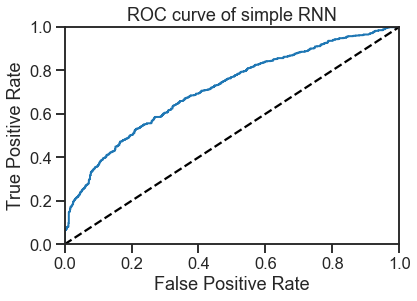

area under the curve is: 0.713272839884151


In [72]:
y_predict = RNN_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple RNN')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

## 4.3(option3_word2vec) Simple RNN binary classification with prepare 

In [73]:
RNN_model = Sequential()
RNN_model.add(Embedding(vocab_size, embedding_vector_length, 
                        weights=[embedding_matrix_w2v],
                        input_length=max_twitter_length,
                         trainable=False))
RNN_model.add(SimpleRNN(100))
RNN_model.add(Dense(1, activation='sigmoid'))
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = RNN_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=256, verbose=2)
scores = RNN_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
24/24 - 1s - loss: 0.6589 - accuracy: 0.6099 - val_loss: 0.6491 - val_accuracy: 0.6152
Epoch 2/10
24/24 - 1s - loss: 0.5960 - accuracy: 0.6849 - val_loss: 0.6183 - val_accuracy: 0.6619
Epoch 3/10
24/24 - 1s - loss: 0.5491 - accuracy: 0.7217 - val_loss: 0.6152 - val_accuracy: 0.6684
Epoch 4/10
24/24 - 1s - loss: 0.5079 - accuracy: 0.7514 - val_loss: 0.6277 - val_accuracy: 0.6658
Epoch 5/10
24/24 - 1s - loss: 0.4677 - accuracy: 0.7796 - val_loss: 0.6581 - val_accuracy: 0.6546
Epoch 6/10
24/24 - 1s - loss: 0.4666 - accuracy: 0.7750 - val_loss: 0.6891 - val_accuracy: 0.6218
Epoch 7/10
24/24 - 1s - loss: 0.4238 - accuracy: 0.8100 - val_loss: 0.7006 - val_accuracy: 0.6461
Epoch 8/10
24/24 - 1s - loss: 0.3739 - accuracy: 0.8394 - val_loss: 0.7365 - val_accuracy: 0.6481
Epoch 9/10
24/24 - 1s - loss: 0.3287 - accuracy: 0.8631 - val_loss: 0.8088 - val_accuracy: 0.6369
Epoch 10/10
24/24 - 1s - loss: 0.2900 - accuracy: 0.8839 - val_loss: 0.8496 - val_accuracy: 0.6566
Accuracy: 65.66%


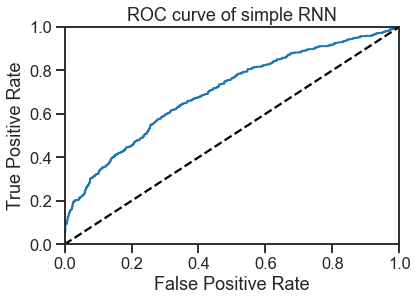

area under the curve is: 0.6982823238774929


In [74]:
y_predict = RNN_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple RNN')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

analysis:
this is kind of depressing, RNN with pre-tain word embedding are not doing better then embedding on fly again, and it does not help with RNN compare to ANN

Conclusion:
- simple ANN is preform better than RNN
- pretrain vector glove and word2vec both preform worse than embedding on fly with ANN and RNN

## 4.3a(option1) Simple RNN binary classification with regularization(l2 and dropout)

In [75]:
RNN_re_model = Sequential()
RNN_re_model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))
RNN_re_model.add(Dropout(0.3))
RNN_re_model.add(SimpleRNN(100,kernel_regularizer=tf.keras.regularizers.L2(0.01)))
RNN_re_model.add(Dense(1, activation='sigmoid'))
RNN_re_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = RNN_re_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=256, verbose=2)
scores = RNN_re_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
24/24 - 5s - loss: 1.8102 - accuracy: 0.6384 - val_loss: 1.4406 - val_accuracy: 0.6947
Epoch 2/10
24/24 - 4s - loss: 1.0732 - accuracy: 0.8438 - val_loss: 1.0437 - val_accuracy: 0.7597
Epoch 3/10
24/24 - 4s - loss: 0.6286 - accuracy: 0.9396 - val_loss: 0.9117 - val_accuracy: 0.7505
Epoch 4/10
24/24 - 4s - loss: 0.4098 - accuracy: 0.9667 - val_loss: 0.8810 - val_accuracy: 0.7177
Epoch 5/10
24/24 - 4s - loss: 0.2875 - accuracy: 0.9757 - val_loss: 0.7386 - val_accuracy: 0.7702
Epoch 6/10
24/24 - 4s - loss: 0.2129 - accuracy: 0.9765 - val_loss: 0.6921 - val_accuracy: 0.7669
Epoch 7/10
24/24 - 5s - loss: 0.1654 - accuracy: 0.9818 - val_loss: 0.6770 - val_accuracy: 0.7676
Epoch 8/10
24/24 - 4s - loss: 0.1303 - accuracy: 0.9833 - val_loss: 0.6740 - val_accuracy: 0.7689
Epoch 9/10
24/24 - 5s - loss: 0.1110 - accuracy: 0.9834 - val_loss: 0.7259 - val_accuracy: 0.7328
Epoch 10/10
24/24 - 5s - loss: 0.0981 - accuracy: 0.9847 - val_loss: 0.6506 - val_accuracy: 0.7538
Accuracy: 75.38%


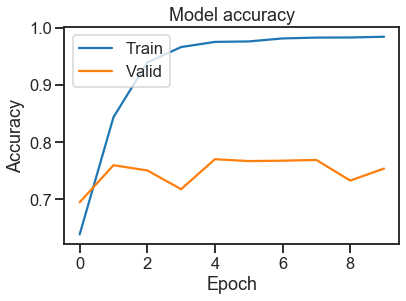

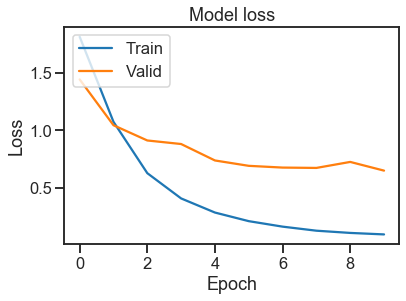

In [76]:
plot_acc_loss(history)

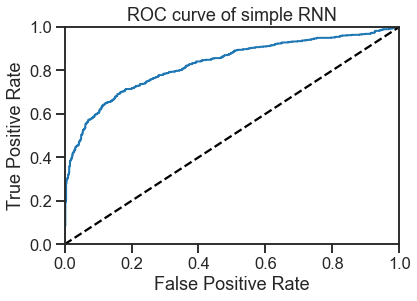

area under the curve is: 0.8278778377199001


In [77]:
y_predict = RNN_re_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple RNN')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

Analysis:

RNN with regularization did not do anything to our dataset, there is no point to try them with pre-train embedding,
next: let't try with different RNN model to see if we have any luck

## 4.3b(option1) Simple RNN binary classification with regularization(l2)

In [82]:
RNN_re_model = Sequential()
RNN_re_model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))
RNN_re_model.add(Dropout(0.3))
RNN_re_model.add(SimpleRNN(100))
RNN_re_model.add(Dense(1, activation='sigmoid'))
RNN_re_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = RNN_re_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=256, verbose=2)
scores = RNN_re_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
24/24 - 4s - loss: 0.6460 - accuracy: 0.6259 - val_loss: 0.6000 - val_accuracy: 0.6835
Epoch 2/10
24/24 - 4s - loss: 0.3860 - accuracy: 0.8498 - val_loss: 0.5893 - val_accuracy: 0.7295
Epoch 3/10
24/24 - 4s - loss: 0.1417 - accuracy: 0.9527 - val_loss: 0.6605 - val_accuracy: 0.7196
Epoch 4/10
24/24 - 4s - loss: 0.0753 - accuracy: 0.9772 - val_loss: 0.7305 - val_accuracy: 0.7170
Epoch 5/10
24/24 - 4s - loss: 0.0540 - accuracy: 0.9844 - val_loss: 0.7385 - val_accuracy: 0.7150
Epoch 6/10
24/24 - 4s - loss: 0.0412 - accuracy: 0.9865 - val_loss: 0.7319 - val_accuracy: 0.7236
Epoch 7/10
24/24 - 4s - loss: 0.0297 - accuracy: 0.9898 - val_loss: 0.7927 - val_accuracy: 0.6999
Epoch 8/10
24/24 - 4s - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.7876 - val_accuracy: 0.7085
Epoch 9/10
24/24 - 4s - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.8161 - val_accuracy: 0.7157
Epoch 10/10
24/24 - 4s - loss: 0.0166 - accuracy: 0.9926 - val_loss: 0.7787 - val_accuracy: 0.7360
Accuracy: 73.60%


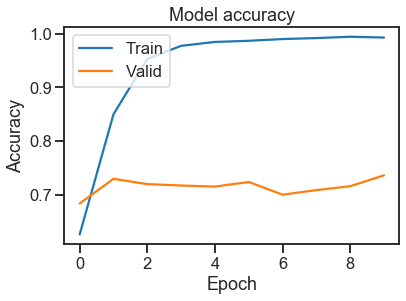

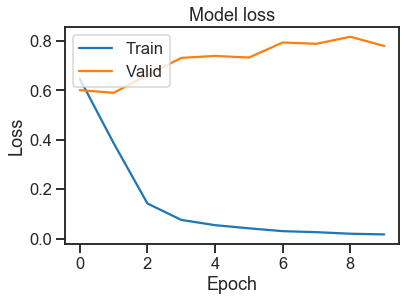

In [83]:
plot_acc_loss(history)

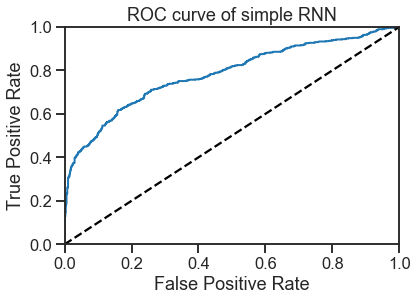

area under the curve is: 0.7821637581247383


In [84]:
y_predict = RNN_re_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple RNN')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

## 4.4 (option1) simple GRU model
note: that GRU model is a bit more advance version of RNN, since it use a memory cell the remeber the state of the previous cell, it should working abit bettern than Simple RNN

In [85]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))
model.add(GRU(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])   
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=256, verbose=2)
scores = model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
24/24 - 6s - loss: 0.6536 - accuracy: 0.6218 - val_loss: 0.6126 - val_accuracy: 0.6487
Epoch 2/10
24/24 - 5s - loss: 0.4820 - accuracy: 0.7663 - val_loss: 0.4729 - val_accuracy: 0.7905
Epoch 3/10
24/24 - 5s - loss: 0.2300 - accuracy: 0.9072 - val_loss: 0.5555 - val_accuracy: 0.7643
Epoch 4/10
24/24 - 5s - loss: 0.1050 - accuracy: 0.9632 - val_loss: 0.6798 - val_accuracy: 0.7643
Epoch 5/10
24/24 - 5s - loss: 0.0612 - accuracy: 0.9814 - val_loss: 0.7857 - val_accuracy: 0.7426
Epoch 6/10
24/24 - 5s - loss: 0.0387 - accuracy: 0.9895 - val_loss: 0.9000 - val_accuracy: 0.7354
Epoch 7/10
24/24 - 5s - loss: 0.0288 - accuracy: 0.9918 - val_loss: 0.9722 - val_accuracy: 0.7249
Epoch 8/10
24/24 - 5s - loss: 0.0207 - accuracy: 0.9949 - val_loss: 1.0954 - val_accuracy: 0.7354
Epoch 9/10
24/24 - 6s - loss: 0.0192 - accuracy: 0.9938 - val_loss: 1.0823 - val_accuracy: 0.7459
Epoch 10/10
24/24 - 5s - loss: 0.0184 - accuracy: 0.9946 - val_loss: 1.1063 - val_accuracy: 0.7315
Accuracy: 73.15%


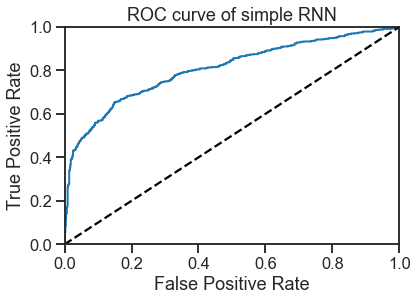

area under the curve is: 0.8055904533665537


In [86]:
y_predict = model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple RNN')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

## 4.4a(option1) simple GRU model with regularization

In [95]:
GRU_re_model = Sequential()
GRU_re_model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))
GRU_re_model.add(Dropout(0.8))
#GRU_re_model.add(GRU(100,kernel_regularizer=tf.keras.regularizers.L2(0.2)))
GRU_re_model.add(GRU(100))
GRU_re_model.add(Dense(1, activation='sigmoid'))
GRU_re_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = GRU_re_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=256, verbose=2)
scores = GRU_re_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
24/24 - 6s - loss: 0.6679 - accuracy: 0.5869 - val_loss: 0.6285 - val_accuracy: 0.6632
Epoch 2/10
24/24 - 5s - loss: 0.5971 - accuracy: 0.6737 - val_loss: 0.5666 - val_accuracy: 0.7288
Epoch 3/10
24/24 - 5s - loss: 0.4368 - accuracy: 0.8015 - val_loss: 0.4598 - val_accuracy: 0.8050
Epoch 4/10
24/24 - 6s - loss: 0.3096 - accuracy: 0.8711 - val_loss: 0.4780 - val_accuracy: 0.7905
Epoch 5/10
24/24 - 7s - loss: 0.2455 - accuracy: 0.8990 - val_loss: 0.5002 - val_accuracy: 0.7925
Epoch 6/10
24/24 - 6s - loss: 0.1915 - accuracy: 0.9245 - val_loss: 0.5404 - val_accuracy: 0.7722
Epoch 7/10
24/24 - 6s - loss: 0.1495 - accuracy: 0.9412 - val_loss: 0.5818 - val_accuracy: 0.8017
Epoch 8/10
24/24 - 6s - loss: 0.1184 - accuracy: 0.9552 - val_loss: 0.6784 - val_accuracy: 0.7754
Epoch 9/10
24/24 - 6s - loss: 0.0988 - accuracy: 0.9634 - val_loss: 0.7018 - val_accuracy: 0.7643
Epoch 10/10
24/24 - 6s - loss: 0.0772 - accuracy: 0.9719 - val_loss: 0.7424 - val_accuracy: 0.7505
Accuracy: 75.05%


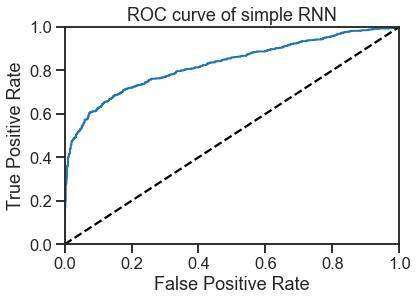

area under the curve is: 0.8269619901253857


In [96]:
y_predict = GRU_re_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple RNN')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

Analysis:
- first notice that after we apply regularization to GRU it has increase 5% of accuracy that's a lot, this is implication regularization actually working, let't try them with option2 and 3


## 4.4a(option2) simple GRU model with regularization

In [91]:
GRU_re_model = Sequential()
GRU_re_model.add(Embedding(vocab_size, embedding_vector_length, 
                        weights=[embedding_matrix_w2v],
                        input_length=max_twitter_length,
                         trainable=False))
#GRU_re_model.add(Dropout(0.4))
#GRU_re_model.add(GRU(100,kernel_regularizer=tf.keras.regularizers.L2(0.01)))
GRU_re_model.add(GRU(100))
GRU_re_model.add(Dense(1, activation='sigmoid'))
GRU_re_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = GRU_re_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=15, batch_size=256, verbose=2)
scores = GRU_re_model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/15
24/24 - 3s - loss: 0.6684 - accuracy: 0.6016 - val_loss: 0.6731 - val_accuracy: 0.6218
Epoch 2/15
24/24 - 2s - loss: 0.6542 - accuracy: 0.6190 - val_loss: 0.6549 - val_accuracy: 0.6159
Epoch 3/15
24/24 - 3s - loss: 0.6410 - accuracy: 0.6323 - val_loss: 0.6511 - val_accuracy: 0.6172
Epoch 4/15
24/24 - 3s - loss: 0.6246 - accuracy: 0.6461 - val_loss: 0.6563 - val_accuracy: 0.6316
Epoch 5/15
24/24 - 2s - loss: 0.5895 - accuracy: 0.6946 - val_loss: 0.6176 - val_accuracy: 0.6638
Epoch 6/15
24/24 - 2s - loss: 0.5574 - accuracy: 0.7209 - val_loss: 0.6156 - val_accuracy: 0.6783
Epoch 7/15
24/24 - 3s - loss: 0.5344 - accuracy: 0.7330 - val_loss: 0.6010 - val_accuracy: 0.6875
Epoch 8/15
24/24 - 3s - loss: 0.5151 - accuracy: 0.7452 - val_loss: 0.5982 - val_accuracy: 0.7012
Epoch 9/15
24/24 - 3s - loss: 0.4977 - accuracy: 0.7609 - val_loss: 0.5974 - val_accuracy: 0.7006
Epoch 10/15
24/24 - 3s - loss: 0.4806 - accuracy: 0.7681 - val_loss: 0.5941 - val_accuracy: 0.7045
Epoch 11/15
24/24 -

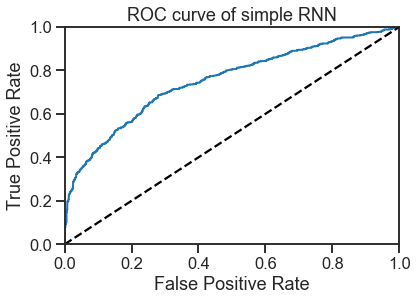

area under the curve is: 0.7511551468699303


In [92]:
y_predict = GRU_re_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple RNN')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

analsys:

again embedding on fly is better

## 4.5(option1) LSTM binary classification

note: LSTM is the advance version of GRU, therefore, it suppose to work better than GRU

In [97]:
embedding_vector_length = 300
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=300, verbose=2)
scores = model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/10
21/21 - 3s - loss: 0.6653 - accuracy: 0.5926 - val_loss: 0.6225 - val_accuracy: 0.6927
Epoch 2/10
21/21 - 3s - loss: 0.5240 - accuracy: 0.7517 - val_loss: 0.4742 - val_accuracy: 0.7794
Epoch 3/10
21/21 - 3s - loss: 0.3138 - accuracy: 0.8700 - val_loss: 0.4541 - val_accuracy: 0.8109
Epoch 4/10
21/21 - 4s - loss: 0.1920 - accuracy: 0.9296 - val_loss: 0.5303 - val_accuracy: 0.7722
Epoch 5/10
21/21 - 3s - loss: 0.1233 - accuracy: 0.9596 - val_loss: 0.6535 - val_accuracy: 0.7787
Epoch 6/10
21/21 - 3s - loss: 0.0887 - accuracy: 0.9716 - val_loss: 0.6608 - val_accuracy: 0.7912
Epoch 7/10
21/21 - 3s - loss: 0.0722 - accuracy: 0.9760 - val_loss: 0.7393 - val_accuracy: 0.7774
Epoch 8/10
21/21 - 3s - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.8032 - val_accuracy: 0.7807
Epoch 9/10
21/21 - 3s - loss: 0.0449 - accuracy: 0.9852 - val_loss: 0.8985 - val_accuracy: 0.7571
Epoch 10/10
21/21 - 3s - loss: 0.0356 - accuracy: 0.9895 - val_loss: 1.0037 - val_accuracy: 0.7708
Accuracy: 77.08%


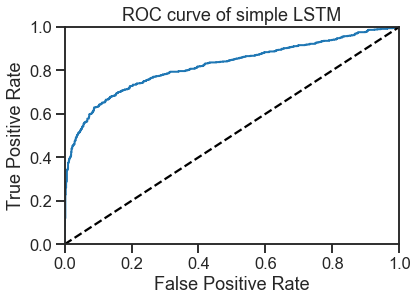

area under the curve is: 0.8219586997603487


In [99]:
y_predict = model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple LSTM')
plt.show()
print("area under the curve is:",roc_auc_score(y_valid, y_predict))

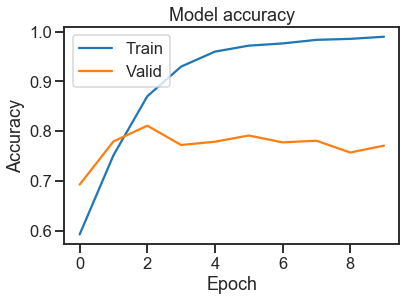

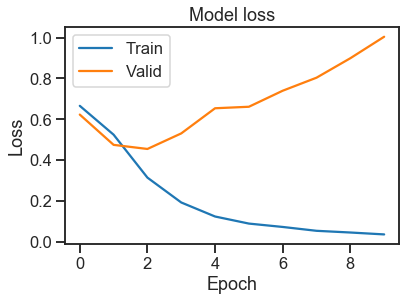

In [100]:
plot_acc_loss(history)

In [ ]:
# it seems we overfit our data lot, it's ok we will optimized this basic model later on

analysis: 

compare to all the RNN model without regularization, LSMT is the best it has increse 3% accuracy. since pre-train embedding never really make our our model better, we won't try it with LSMT

## 4.5a(option1) LSTM binary classification with L2 regularization

In [109]:
#Adding L2 regularization to LSTM model
from keras import regularizers
reg_model = Sequential()
reg_model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))
reg_model.add(Dropout(0.4))
#reg_model.add(LSTM(100,kernel_regularizer=regularizers.l2(0.05),activation='relu'))
reg_model.add(LSTM(100,activation='relu'))
reg_model.add(Dense(1, activation='sigmoid'))
reg_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=300, verbose=2)
scores = model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
21/21 - 4s - loss: 0.0064 - accuracy: 0.9964 - val_loss: 1.8907 - val_accuracy: 0.7603
Epoch 2/10
21/21 - 4s - loss: 0.0063 - accuracy: 0.9964 - val_loss: 1.8907 - val_accuracy: 0.7374
Epoch 3/10
21/21 - 3s - loss: 0.0063 - accuracy: 0.9964 - val_loss: 1.9943 - val_accuracy: 0.7433
Epoch 4/10
21/21 - 3s - loss: 0.0067 - accuracy: 0.9967 - val_loss: 1.8438 - val_accuracy: 0.7380
Epoch 5/10
21/21 - 3s - loss: 0.0065 - accuracy: 0.9967 - val_loss: 2.0432 - val_accuracy: 0.7564
Epoch 6/10
21/21 - 3s - loss: 0.0064 - accuracy: 0.9967 - val_loss: 1.8928 - val_accuracy: 0.7301
Epoch 7/10
21/21 - 3s - loss: 0.0064 - accuracy: 0.9962 - val_loss: 2.0047 - val_accuracy: 0.7544
Epoch 8/10
21/21 - 3s - loss: 0.0061 - accuracy: 0.9962 - val_loss: 2.1090 - val_accuracy: 0.7479
Epoch 9/10
21/21 - 3s - loss: 0.0062 - accuracy: 0.9961 - val_loss: 1.9995 - val_accuracy: 0.7459
Epoch 10/10
21/21 - 3s - loss: 0.0061 - accuracy: 0.9966 - val_loss: 2.1566 - val_accuracy: 0.7433
Accuracy: 74.33%


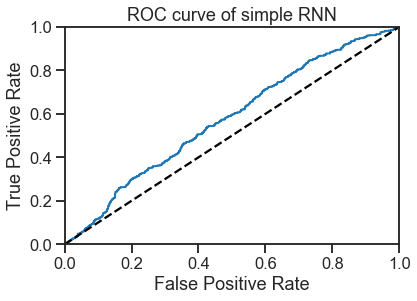

area under the curve is: 0.5756053743801973


In [110]:
y_predict = reg_model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple RNN')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

analysis:

the model start to overfit at the first epoch even with regular parameter =0.8, let's usd drop instead in the next try

## 4.5(option2) LSTM binary classification

In [114]:
embedding_vector_length = 300
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, 
                        weights=[embedding_matrix_w2v],
                        input_length=max_twitter_length,
                         trainable=False))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=300, verbose=2)
scores = model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/10
21/21 - 3s - loss: 0.6600 - accuracy: 0.6136 - val_loss: 0.6428 - val_accuracy: 0.6362
Epoch 2/10
21/21 - 3s - loss: 0.6181 - accuracy: 0.6609 - val_loss: 0.6169 - val_accuracy: 0.6546
Epoch 3/10
21/21 - 3s - loss: 0.5838 - accuracy: 0.6947 - val_loss: 0.6100 - val_accuracy: 0.6822
Epoch 4/10
21/21 - 3s - loss: 0.5619 - accuracy: 0.7149 - val_loss: 0.5954 - val_accuracy: 0.6907
Epoch 5/10
21/21 - 3s - loss: 0.5418 - accuracy: 0.7259 - val_loss: 0.5945 - val_accuracy: 0.6967
Epoch 6/10
21/21 - 3s - loss: 0.5329 - accuracy: 0.7373 - val_loss: 0.5919 - val_accuracy: 0.7065
Epoch 7/10
21/21 - 3s - loss: 0.5112 - accuracy: 0.7548 - val_loss: 0.5876 - val_accuracy: 0.7098
Epoch 8/10
21/21 - 3s - loss: 0.4921 - accuracy: 0.7645 - val_loss: 0.6023 - val_accuracy: 0.7039
Epoch 9/10
21/21 - 3s - loss: 0.4742 - accuracy: 0.7777 - val_loss: 0.6165 - val_accuracy: 0.7026
Epoch 10/10
21/21 - 3s - loss: 0.4563 - accuracy: 0.7860 - val_loss: 0.6399 - val_accuracy: 0.7104
Accuracy: 71.04%


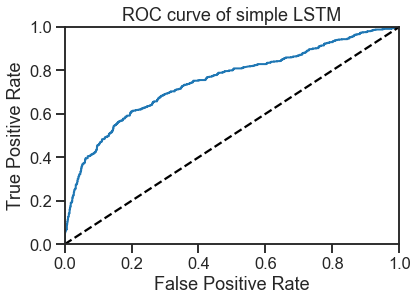

area under the curve is: 0.749743984966375


In [115]:
y_predict = model.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of simple LSTM')
plt.show()
print("area under the curve is:",roc_auc_score(y_valid, y_predict))

## 4.5(option3) LSTM binary classification

## 4.5b(option1) LSTM binary classification combined with dropout, and early stopping strategy

note1: as usual we need dropout technique to regulariz our model in order to improve our model preformance, however, as we can see from the previous model that the val_accuracy's value is constantly fluctuating, therefore, we add early stopping to our model in order to pick up the best model.



In [141]:
#Adding early stopping and adding dropouts to improvize the base model.
from keras.layers import Dropout
embedding_vector_length = 300
model_dropout = Sequential()
model_dropout.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))
model_dropout.add(Dropout(0.2))
model_dropout.add(LSTM(100))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(1, activation='sigmoid'))
model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [142]:
es = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
history = model_dropout.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=300, verbose=2, callbacks=es)
scores = model_dropout.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
21/21 - 7s - loss: 0.6451 - accuracy: 0.6218 - val_loss: 0.5911 - val_accuracy: 0.6894
Epoch 2/10
21/21 - 6s - loss: 0.4869 - accuracy: 0.7718 - val_loss: 0.4622 - val_accuracy: 0.7912
Epoch 3/10
21/21 - 7s - loss: 0.2771 - accuracy: 0.8869 - val_loss: 0.4680 - val_accuracy: 0.8011
Epoch 4/10
21/21 - 6s - loss: 0.1683 - accuracy: 0.9389 - val_loss: 0.5767 - val_accuracy: 0.7919
Epoch 5/10
21/21 - 7s - loss: 0.0988 - accuracy: 0.9663 - val_loss: 0.7031 - val_accuracy: 0.7787
Epoch 6/10
21/21 - 6s - loss: 0.0652 - accuracy: 0.9785 - val_loss: 0.7549 - val_accuracy: 0.7768
Accuracy: 79.12%


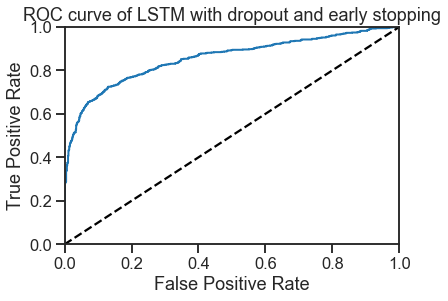

area under the curve is: 0.8555635321980695


In [143]:
y_predict = model_dropout.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, y_predict)

plot_roc_curve(fpr, tpr)
plt.title('ROC curve of LSTM with dropout and early stopping')
plt.show()

print("area under the curve is:",roc_auc_score(y_valid, y_predict))

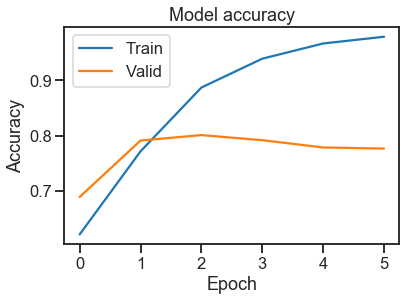

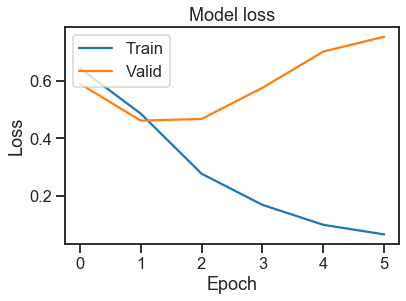

In [144]:
plot_acc_loss(history)

analysis:
- seems dropout is a more powerful regularization since it did bring down our trainset accuracy, and the combination of dropout with early stopping is a great way to find the best parameter weight, since it did give us the best accurcy and auc score
    

## 4.6(option1) Bidirectinal RNN

note: 
bidirectinal RNN is the most adavange model compare to GRU and LSTM, since the prediciton of each word is not only depents on the previous sequence but also take into acount of the later sequence. theoretically speaking, this model should be the best

In [126]:
from tensorflow.keras import layers
model_BiRnn = Sequential()
model_BiRnn.add(Embedding(vocab_size, embedding_vector_length, input_length=max_twitter_length))
#model_BiRnn.add(Dropout(0.4))
model_BiRnn.add(layers.Bidirectional(layers.LSTM(100,kernel_regularizer=regularizers.l2(0.1), return_sequences=True)))
#model_BiRnn.add(layers.Bidirectional(layers.LSTM(100)))
model_BiRnn.add(layers.Dense(1,activation='sigmoid'))
model_BiRnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_BiRnn.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=300, verbose=2)
scores = model_BiRnn.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
21/21 - 11s - loss: 50.9447 - accuracy: 0.5690 - val_loss: 33.0985 - val_accuracy: 0.6943
Epoch 2/10
21/21 - 11s - loss: 23.2251 - accuracy: 0.7288 - val_loss: 14.2791 - val_accuracy: 0.7491
Epoch 3/10
21/21 - 10s - loss: 9.6376 - accuracy: 0.8601 - val_loss: 5.8715 - val_accuracy: 0.7282
Epoch 4/10
21/21 - 11s - loss: 3.7292 - accuracy: 0.8938 - val_loss: 2.4620 - val_accuracy: 0.7391
Epoch 5/10
21/21 - 11s - loss: 1.4002 - accuracy: 0.9320 - val_loss: 1.3288 - val_accuracy: 0.7434
Epoch 6/10
21/21 - 10s - loss: 0.5704 - accuracy: 0.9425 - val_loss: 0.9823 - val_accuracy: 0.7356
Epoch 7/10
21/21 - 10s - loss: 0.3051 - accuracy: 0.9465 - val_loss: 0.8787 - val_accuracy: 0.7340
Epoch 8/10
21/21 - 10s - loss: 0.2236 - accuracy: 0.9531 - val_loss: 1.0157 - val_accuracy: 0.7185
Epoch 9/10
21/21 - 10s - loss: 0.2090 - accuracy: 0.9578 - val_loss: 0.9774 - val_accuracy: 0.7158
Epoch 10/10
21/21 - 10s - loss: 0.1576 - accuracy: 0.9675 - val_loss: 0.8254 - val_accuracy: 0.7395
Accur

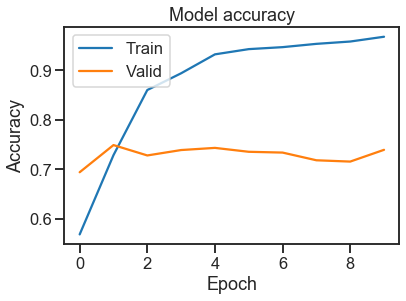

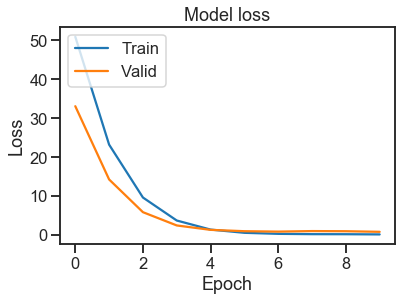

In [127]:
plot_acc_loss(history)

In [128]:
from tensorflow.keras import layers
model_BiRnn = Sequential()
model_BiRnn.add(Embedding(vocab_size, embedding_vector_length, 
                        weights=[embedding_matrix_glove],
                        input_length=max_twitter_length,
                         trainable=False))
#model_BiRnn.add(layers.Bidirectional(layers.LSTM(100,kernel_regularizer=regularizers.l2(0.1), return_sequences=True)))
model_BiRnn.add(layers.Bidirectional(layers.LSTM(100)))
model_BiRnn.add(layers.Dense(1,activation='sigmoid'))
model_BiRnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_BiRnn.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=300, verbose=2)
scores = model_BiRnn.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
21/21 - 8s - loss: 0.6595 - accuracy: 0.6174 - val_loss: 0.6300 - val_accuracy: 0.6428
Epoch 2/10
21/21 - 6s - loss: 0.5957 - accuracy: 0.6837 - val_loss: 0.5946 - val_accuracy: 0.6861
Epoch 3/10
21/21 - 5s - loss: 0.5541 - accuracy: 0.7199 - val_loss: 0.5806 - val_accuracy: 0.7065
Epoch 4/10
21/21 - 6s - loss: 0.5155 - accuracy: 0.7499 - val_loss: 0.5685 - val_accuracy: 0.7111
Epoch 5/10
21/21 - 5s - loss: 0.4764 - accuracy: 0.7772 - val_loss: 0.6092 - val_accuracy: 0.6829
Epoch 6/10
21/21 - 5s - loss: 0.4377 - accuracy: 0.8013 - val_loss: 0.5666 - val_accuracy: 0.7229
Epoch 7/10
21/21 - 5s - loss: 0.3900 - accuracy: 0.8287 - val_loss: 0.5885 - val_accuracy: 0.7223
Epoch 8/10
21/21 - 5s - loss: 0.3462 - accuracy: 0.8542 - val_loss: 0.5914 - val_accuracy: 0.7301
Epoch 9/10
21/21 - 6s - loss: 0.3033 - accuracy: 0.8768 - val_loss: 0.6753 - val_accuracy: 0.7203
Epoch 10/10
21/21 - 6s - loss: 0.2703 - accuracy: 0.8923 - val_loss: 0.7149 - val_accuracy: 0.7177
Accuracy: 71.77%


In [129]:
from tensorflow.keras import layers
model_BiRnn = Sequential()
model_BiRnn.add(Embedding(vocab_size, embedding_vector_length, 
                        weights=[embedding_matrix_w2v],
                        input_length=max_twitter_length,
                         trainable=False))
#model_BiRnn.add(layers.Bidirectional(layers.LSTM(100,kernel_regularizer=regularizers.l2(0.1), return_sequences=True)))
model_BiRnn.add(layers.Bidirectional(layers.LSTM(100)))
model_BiRnn.add(layers.Dense(1,activation='sigmoid'))
model_BiRnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_BiRnn.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=300, verbose=2)
scores = model_BiRnn.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
21/21 - 7s - loss: 0.6641 - accuracy: 0.6048 - val_loss: 0.6425 - val_accuracy: 0.6415
Epoch 2/10
21/21 - 6s - loss: 0.6050 - accuracy: 0.6755 - val_loss: 0.6151 - val_accuracy: 0.6645
Epoch 3/10
21/21 - 6s - loss: 0.5721 - accuracy: 0.7030 - val_loss: 0.5905 - val_accuracy: 0.6947
Epoch 4/10
21/21 - 6s - loss: 0.5519 - accuracy: 0.7195 - val_loss: 0.6101 - val_accuracy: 0.6691
Epoch 5/10
21/21 - 6s - loss: 0.5343 - accuracy: 0.7373 - val_loss: 0.5895 - val_accuracy: 0.7091
Epoch 6/10
21/21 - 6s - loss: 0.5156 - accuracy: 0.7450 - val_loss: 0.6027 - val_accuracy: 0.6967
Epoch 7/10
21/21 - 6s - loss: 0.4897 - accuracy: 0.7647 - val_loss: 0.6200 - val_accuracy: 0.6934
Epoch 8/10
21/21 - 5s - loss: 0.4666 - accuracy: 0.7849 - val_loss: 0.5747 - val_accuracy: 0.7157
Epoch 9/10
21/21 - 6s - loss: 0.4624 - accuracy: 0.7859 - val_loss: 0.5935 - val_accuracy: 0.7144
Epoch 10/10
21/21 - 6s - loss: 0.4282 - accuracy: 0.8048 - val_loss: 0.6184 - val_accuracy: 0.7157
Accuracy: 71.57%


# conclusion:
- purely conparing all the models base one accuracy metric, simple ANN outpreform all the rest of the models such as RNN GRU or LSTM, this maybe caused due to our NLP problem is more like a classification problem but not a sequence to sequence prediction problem.

- by take advantage of pre-train embedding vectors from glove and word2vec, it did not make our model better, suprisingly, the on fly embedding with tensorflow embedding layer actully working the best with our dataset; this probably due to that we have a small dataset, therefore use a on fly training can better fit our dataset.

- regularization technique does help reduce overfit problem, but in order to find the best hyperparameter to significant solve overfitting is hard, note:dropout is more powerful then L2 regularization

- early stoppting technique is quite practical to find the best parameter of the model especiall when the metric constantly fluctuating around certain range

- seem not matter how much effort we try to tunning the model, the accuracy is not to go above 82%, this probably due to the data itself, therefore, it may requires us to do more deelp cleaning on the dataset

- lesson learned: to solve any problem, it is not about how advanced the model or the algorithm it is, it is more important to absolutely clear on what kind of problem you try to solve and find the most appropriate model to the problem
